### Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from gensim.utils import simple_preprocess
from collections import Counter
from nltk.util import ngrams

import json
import ast
import string


### Data Preprocessing

In [ ]:
# Load the dataset
tweets_data = pd.read_csv('tweets_final.csv')
# Display the first 5 rows of the dataset
tweets_data

,Unnamed: 0,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,0,snscrape.modules.twitter.Tweet,https://twitter.com/pat_ianni/status/150025982...,2022-03-05 23:59:50+00:00,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,JOE BIDEN SAYS HOW DO WE GET TO A PLACE WHERE ...,1500259827154505728,"{'_type': 'snscrape.modules.twitter.User', 'us...",14,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia invade
1,1,snscrape.modules.twitter.Tweet,https://twitter.com/luxeprogressive/status/150...,2022-03-05 23:59:05+00:00,@ProfPaulPoast He doesn’t have to like it but ...,@ProfPaulPoast He doesn’t have to like it but ...,1500259636863246336,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
2,2,snscrape.modules.twitter.Tweet,https://twitter.com/spielblog/status/150025947...,2022-03-05 23:58:26+00:00,@SemproniusT @RichardHanania And if NATO is th...,@SemproniusT @RichardHanania And if NATO is th...,1500259474040180738,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,...,NaN,NaN,1.500259e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
3,3,snscrape.modules.twitter.Tweet,https://twitter.com/JumboSlunce/status/1500259...,2022-03-05 23:58:20+00:00,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,@jakehase @Groutandgo @MysticAura_ @SkylarJord...,1500259447742115841,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,...,NaN,NaN,1.500248e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade
4,4,snscrape.modules.twitter.Tweet,https://twitter.com/ronanmcmanus/status/150025...,2022-03-05 23:58:17+00:00,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,@2_4_5T_2_4_D @carolecadwalla @estellecostanza...,1500259435142340608,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,...,NaN,NaN,1.500258e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,NaN,NaN,Russia invade


In [ ]:
# Display columns of dataset
print(tweets_data.columns.tolist())

['Unnamed: 0', '_type', 'url', 'date', 'content', 'renderedContent', 'id', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl', 'sourceLabel', 'outlinks', 'tcooutlinks', 'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags', 'cashtags', 'Searh']


In [ ]:
# Check the shape of the dataset
shape = tweets_data.shape

# Check for missing values in the dataset
missing_values = tweets_data.isnull().sum()

# Display the shape and missing values
shape, missing_values

((1204218, 30),
 Unnamed: 0                0
 _type                     0
 url                       0
 date                      0
 content                   0
 renderedContent           0
 id                        0
 user                      0
 replyCount                0
 retweetCount              0
 likeCount                 0
 quoteCount                0
 conversationId            0
 lang                      0
 source                    0
 sourceUrl                 0
 sourceLabel               0
 outlinks             812731
 tcooutlinks          812731
 media               1074145
 retweetedTweet      1204218
 quotedTweet         1095124
 inReplyToTweetId     647260
 inReplyToUser        647260
 mentionedUsers       575468
 coordinates         1189330
 place               1189330
 hashtags             943344
 cashtags            1201410
 Searh                     0
 dtype: int64)

In [ ]:
# Drop unnecessary columns
tweets_data.drop(['Unnamed: 0', '_type', 'url', 'renderedContent', 'user', 'lang'], axis='columns', inplace=True)

# Drop rows with NaN in 'content' column
tweets_data.dropna(subset=['content'], inplace=True)

# Fill NA with blanks
tweets_data.fillna("", inplace=True)

tweets_data.shape

(1204218, 24)

In [ ]:

# Modify 'content' column to be all lowercase
tweets_data['content'] = tweets_data['content'].str.lower()

# Convert date column
tweets_data['date'] = pd.to_datetime(tweets_data['date'])
tweets_data['date'] = tweets_data['date'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the first few rows of the cleaned dataset
tweets_data.head()

,date,content,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,Searh
0,2022-03-05 23:59:50,joe biden says how do we get to a place where ...,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,,,,,,,,Russia invade
1,2022-03-05 23:59:05,@profpaulpoast he doesn’t have to like it but ...,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,...,,,1500259286198407168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,,Russia invade
2,2022-03-05 23:58:26,@semproniust @richardhanania and if nato is th...,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,,1500259047387271168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,,Russia invade
3,2022-03-05 23:58:20,@jakehase @groutandgo @mysticaura_ @skylarjord...,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,1500247905449426944.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,,Russia invade
4,2022-03-05 23:58:17,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,,1500258326936006912.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,,Russia invade


In [ ]:
def extract_city_country(row):
    try:
        # Use ast.literal_eval() to safely evaluate the string as a Python literal (dictionary)
        place_data = ast.literal_eval(row)

        # Extract city and country from the parsed dictionary
        city = place_data.get('name', '')
        country = place_data.get('country', '')

        # Return city and country as a Series
        return pd.Series([city, country], index=['city', 'country'])
    except:
        # Handle exceptions if parsing fails
        return pd.Series(['', ''], index=['city', 'country'])

tweets_data[['city', 'country']] = tweets_data['place'].apply(extract_city_country)
tweets_data.drop('place', axis=1, inplace=True)


In [ ]:
tweets_data.head()

,date,content,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,...,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,hashtags,cashtags,Searh,city,country
0,2022-03-05 23:59:50,joe biden says how do we get to a place where ...,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,,,,,,Russia invade,,
1,2022-03-05 23:59:05,@profpaulpoast he doesn’t have to like it but ...,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,...,,1500259286198407168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,
2,2022-03-05 23:58:26,@semproniust @richardhanania and if nato is th...,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,1500259047387271168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,
3,2022-03-05 23:58:20,@jakehase @groutandgo @mysticaura_ @skylarjord...,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,1500247905449426944.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,
4,2022-03-05 23:58:17,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,1500258326936006912.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,


In [ ]:
# Label categories
unique_values = tweets_data['Searh'].unique()
print(unique_values)


['Russia invade' 'Russian border Ukraine' 'Russian troops'
 'StandWithUkraine' 'Ukraine border' 'Ukraine NATO' 'Ukraine troops'
 'Ukraine war']


### Expanding Contractions and Removing URLs

In [ ]:
def manually_expand_contractions(text):
    # Define a dictionary of common contractions and their expanded forms
    contractions_dict = {
        "I'm": "I am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are",
        "I've": "I have",
        "you've": "you have",
        "we've": "we have",
        "they've": "they have",
        "I'd": "I would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "we'd": "we would",
        "they'd": "they would",
        "I'll": "I will",
        "you'll": "you will",
        "he'll": "he will",
        "she'll": "she will",
        "we'll": "we will",
        "they'll": "they will",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "haven't": "have not",
        "hasn't": "has not",
        "hadn't": "had not",
        "won't": "will not",
        "wouldn't": "would not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "can't": "cannot",
        "couldn't": "could not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not"
    }

    # Replace each contraction with its expanded form
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)

    return text


def remove_urls_and_fragments(text):
    # Convert non-string data to string
    text = str(text)

    # Manually expand contractions
    text = manually_expand_contractions(text)

    # Remove standard URLs
    url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = url_pattern.sub('', text)

    # Remove common URL fragments
    fragment_patterns = re.compile(r'\b(?:www\.|http|https|com|org|net)\b', re.IGNORECASE)
    text = fragment_patterns.sub('', text)

    # Remove HTML entities and unwanted standalone terms
    html_entities = ["&lt;", "&gt;", "&amp;", "&nbsp;"]
    unwanted_terms = ["\bentp\b", "\bisn\b", "\bni\b", "\bfe\b", "\bnbsp\b", "\bamp\b", "\blt\b", "\bgt\b"]

    text = re.sub(r'\bnbsp\b', ' ', text)

    for entity in html_entities:
        text = text.replace(entity, ' ')

    for term in unwanted_terms:
        text = re.sub(term, ' ', text)

    # Replace redundant whitespace with a single space
    text = re.sub(r'\s{2,}', ' ', text)

    # Trim any leading or trailing whitespace
    text = text.strip()

    return text

In [ ]:
# Remove URLs from the 'content' column
tweets_data['content_no_urls'] = tweets_data['content'].apply(remove_urls_and_fragments)

# Tokenize the text in the 'content' column again
tweets_data['tokens_no_urls'] = tweets_data['content_no_urls'].apply(simple_preprocess)
tweets_data['tokens_no_urls'] = tweets_data['tokens_no_urls'].apply(' '.join)
tweets_data.head()

,date,content,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,...,inReplyToUser,mentionedUsers,coordinates,hashtags,cashtags,Searh,city,country,content_no_urls,tokens_no_urls
0,2022-03-05 23:59:50,joe biden says how do we get to a place where ...,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,,,,Russia invade,,,joe biden says how do we get to a place where ...,joe biden says how do we get to place where pu...
1,2022-03-05 23:59:05,@profpaulpoast he doesn’t have to like it but ...,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,@profpaulpoast he doesn’t have to like it but ...,profpaulpoast he doesn have to like it but it ...
2,2022-03-05 23:58:26,@semproniust @richardhanania and if nato is th...,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,@semproniust @richardhanania and if nato is th...,semproniust richardhanania and if nato is the ...
3,2022-03-05 23:58:20,@jakehase @groutandgo @mysticaura_ @skylarjord...,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,@jakehase @groutandgo @mysticaura_ @skylarjord...,jakehase groutandgo mysticaura_ skylarjordan a...
4,2022-03-05 23:58:17,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,t_ carolecadwalla estellecostanza or is your p...


### Stopword Removal

In [ ]:
# Predefined list of common English stopwords
predefined_stopwords_list = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
    "themselves", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had",
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with",
    "about", "against", "between", "into", "through", "during", "before", "after",
    "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
    "under", "again", "further", "then", "once", "here", "there", "when", "where",
    "why", "how", "all", "any", "both", "each", "few", "more", "most", "other",
    "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too",
    "very", "s", "t", "can", "will", "just", "don", "should", "now"
]

def remove_stopwords_with_predefined_list(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in predefined_stopwords_list] for doc in texts]


# Apply the remove_stopwords_with_predefined_list function to the tokenized text
tweets_data['tokens_no_stopwords_no_urls'] = remove_stopwords_with_predefined_list(tweets_data['tokens_no_urls'])

tweets_data['tokens_no_stopwords_no_urls_string'] = tweets_data['tokens_no_stopwords_no_urls'].apply(lambda x: ' '.join(x))

tweets_data.head()

,date,content,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,...,coordinates,hashtags,cashtags,Searh,city,country,content_no_urls,tokens_no_urls,tokens_no_stopwords_no_urls,tokens_no_stopwords_no_urls_string
0,2022-03-05 23:59:50,joe biden says how do we get to a place where ...,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,,Russia invade,,,joe biden says how do we get to a place where ...,joe biden says how do we get to place where pu...,"[joe, biden, says, get, place, putin, decides,...",joe biden says get place putin decides invade ...
1,2022-03-05 23:59:05,@profpaulpoast he doesn’t have to like it but ...,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,...,,,,Russia invade,,,@profpaulpoast he doesn’t have to like it but ...,profpaulpoast he doesn have to like it but it ...,"[profpaulpoast, doesn, like, countries, sovere...",profpaulpoast doesn like countries sovereign p...
2,2022-03-05 23:58:26,@semproniust @richardhanania and if nato is th...,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,,,Russia invade,,,@semproniust @richardhanania and if nato is th...,semproniust richardhanania and if nato is the ...,"[semproniust, richardhanania, nato, aggressor,...",semproniust richardhanania nato aggressor mayb...
3,2022-03-05 23:58:20,@jakehase @groutandgo @mysticaura_ @skylarjord...,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,...,,,,Russia invade,,,@jakehase @groutandgo @mysticaura_ @skylarjord...,jakehase groutandgo mysticaura_ skylarjordan a...,"[jakehase, groutandgo, mysticaura_, skylarjord...",jakehase groutandgo mysticaura_ skylarjordan a...
4,2022-03-05 23:58:17,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,...,,,,Russia invade,,,@2_4_5t_2_4_d @carolecadwalla @estellecostanza...,t_ carolecadwalla estellecostanza or is your p...,"[t_, carolecadwalla, estellecostanza, point, u...",t_ carolecadwalla estellecostanza point ukrain...


In [ ]:
# Drop unnecessary columns
tweets_data.drop(['content_no_urls', 'tokens_no_urls', 'tokens_no_stopwords_no_urls', 'content'], axis='columns', inplace=True)
tweets_data.rename(columns={'tokens_no_stopwords_no_urls_string': 'content'}, inplace=True)

tweets_data.head()

,date,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,sourceLabel,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,hashtags,cashtags,Searh,city,country,content
0,2022-03-05 23:59:50,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,...,,,,,,,Russia invade,,,joe biden says get place putin decides invade ...
1,2022-03-05 23:59:05,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,...,1500259286198407168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,profpaulpoast doesn like countries sovereign p...
2,2022-03-05 23:58:26,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,1500259047387271168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,semproniust richardhanania nato aggressor mayb...
3,2022-03-05 23:58:20,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,...,1500247905449426944.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,jakehase groutandgo mysticaura_ skylarjordan a...
4,2022-03-05 23:58:17,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,1500258326936006912.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,t_ carolecadwalla estellecostanza point ukrain...


### Remove punctuation

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

tweets_data['content'] = tweets_data['content'].apply(remove_punctuation)

tweets_data.head()

,date,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,sourceLabel,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,hashtags,cashtags,Searh,city,country,content
0,2022-03-05 23:59:50,1500259827154505728,14,26,99,4,1500259827154505728,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,...,,,,,,,Russia invade,,,joe biden says get place putin decides invade ...
1,2022-03-05 23:59:05,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,...,1500259286198407168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,profpaulpoast doesn like countries sovereign p...
2,2022-03-05 23:58:26,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,1500259047387271168.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,semproniust richardhanania nato aggressor mayb...
3,2022-03-05 23:58:20,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,...,1500247905449426944.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,jakehase groutandgo mysticaura skylarjordan al...
4,2022-03-05 23:58:17,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,1500258326936006912.0,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,t carolecadwalla estellecostanza point ukraine...


### Remove rows that are below the threshold for the 'content' column

In [ ]:
# Tokenize the 'content' column to count words
tweets_data['word_count'] = tweets_data['content'].apply(lambda x: len(x.split()))

# Filter the df to remove rows with 'content' less than 15 words -> insignificant
threshold = 15
tweets_data = tweets_data[tweets_data['word_count'] >= threshold]
tweets_data

,date,id,replyCount,retweetCount,likeCount,quoteCount,conversationId,source,sourceUrl,sourceLabel,...,inReplyToUser,mentionedUsers,coordinates,hashtags,cashtags,Searh,city,country,content,word_count
1,2022-03-05 23:59:05,1500259636863246336,0,0,2,0,1500097922788175879,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,profpaulpoast doesn like countries sovereign p...,21
2,2022-03-05 23:58:26,1500259474040180738,1,0,0,0,1500238432206917632,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,semproniust richardhanania nato aggressor mayb...,22
3,2022-03-05 23:58:20,1500259447742115841,1,0,0,0,1499855566335885319,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,jakehase groutandgo mysticaura skylarjordan al...,21
4,2022-03-05 23:58:17,1500259435142340608,0,0,0,0,1500238235552911362,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,t carolecadwalla estellecostanza point ukraine...,20
5,2022-03-05 23:58:04,1500259379878187008,1,0,0,0,1500155969795497990,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,...,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",,,,Russia invade,,,julietturner next ground actually goings ukrai...,22


### Distribution of Words

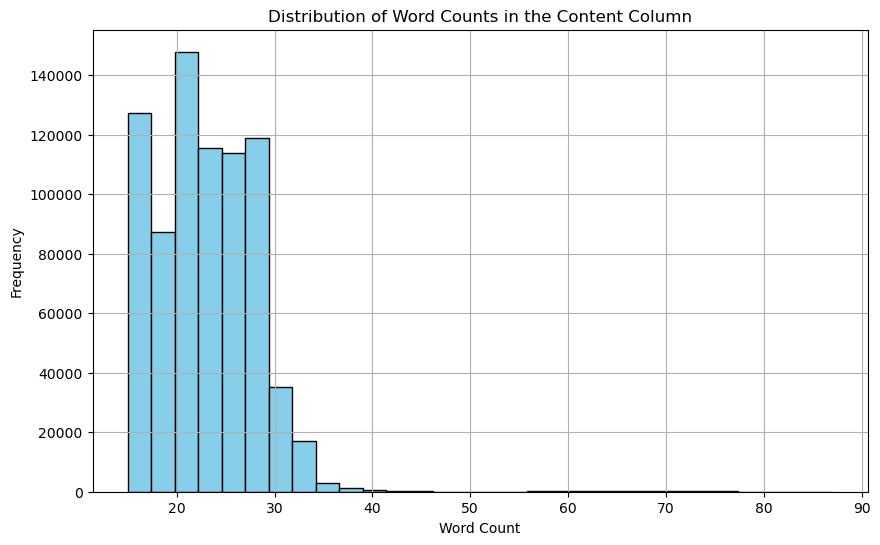

In [ ]:
# Create a histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(tweets_data['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Word Counts in the Content Column')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Distribution of Text Length

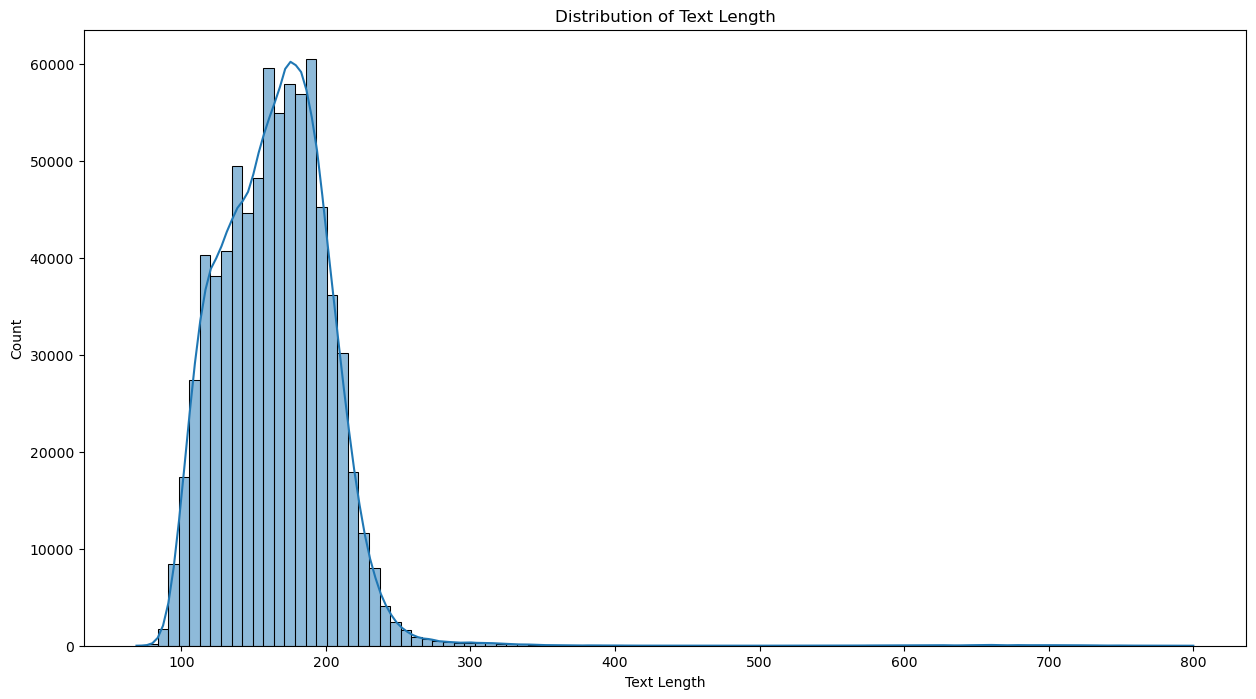

count    769468.000000
mean        165.346923
std          40.546139
min          69.000000
25%         137.000000
50%         166.000000
75%         190.000000
max         800.000000
Name: text_length, dtype: float64

In [ ]:
# Text length i.e. characters in the 'content' column
# Create a new column for the length of the text
tweets_data['text_length'] = tweets_data['content'].apply(len)

# Display basic statistics for text length
text_length_stats = tweets_data['text_length'].describe()

# Plot the distribution of text length
plt.figure(figsize=(15, 8))
sns.histplot(tweets_data['text_length'], bins=100, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

text_length_stats

### Distribution of labels

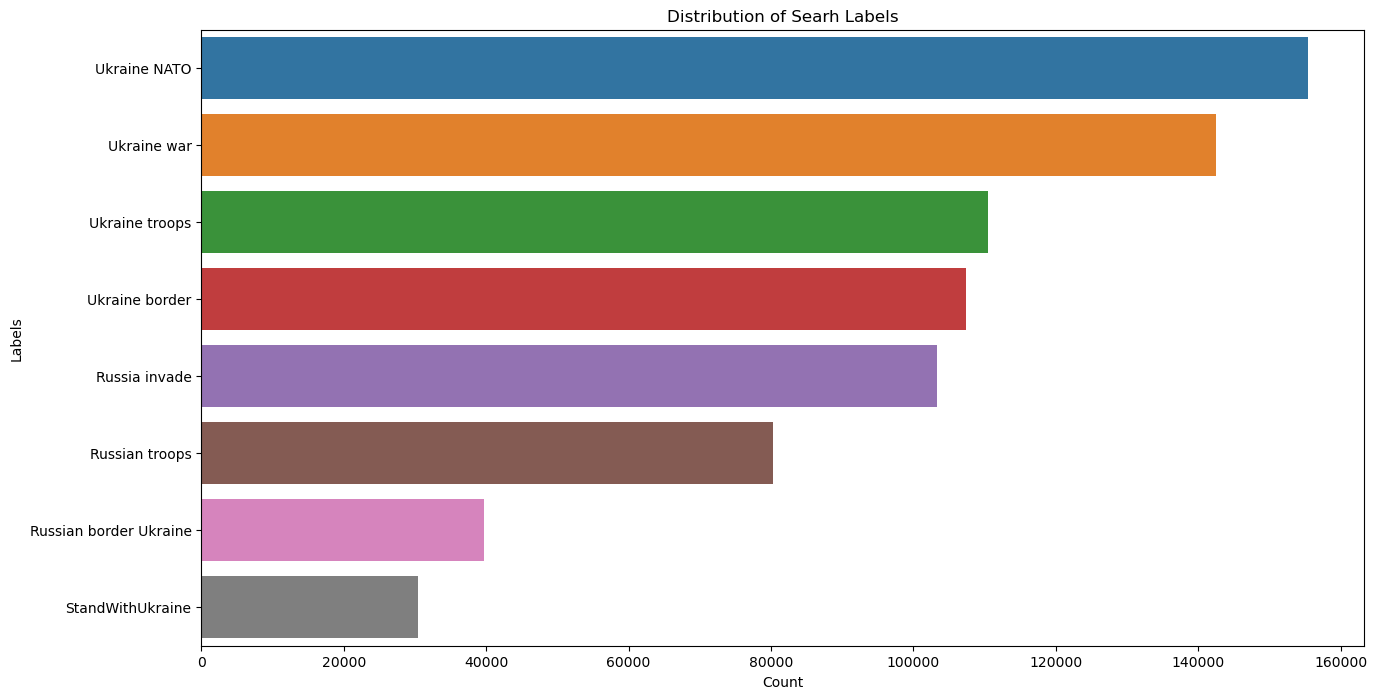

In [ ]:
# Plot the distribution of label
plt.figure(figsize=(15, 8))
sns.countplot(data=tweets_data, y="Searh", order=tweets_data['Searh'].value_counts().index)
plt.title('Distribution of Searh Labels')
plt.xlabel('Count')
plt.ylabel('Labels')
plt.show()